In [1]:
1132226447%70+1

38

# Теоретическое введение

## Модель хищник-жертва


Модель "Хищник-жертва" основывается на следующих предположениях [@Volterra:bash]:

1. Численность популяции жертв $x$ и хищников $y$ зависят только от времени (модель не учитывает пространственное распределение популяции на занимаемой территории)

2. В отсутствии взаимодействия численность видов изменяется по модели Мальтуса (экспоненциальный рост с постоянным темпом), при этом число жертв увеличивается, а число хищников падает

3. Естественная смертность жертвы и естественная рождаемость хищника считаются несущественными

4. Эффект насыщения численности обеих популяций не учитывается

5. Скорость роста численности жертв уменьшается пропорционально численности хищников

$$\begin{cases}
  &\dfrac{dx}{dt} = ax(t)-bx(t)y(t)\\
  &\dfrac{dy}{dt} = -cy(t)+dx(t)y(t)
\end{cases}$$

В этой модели $x$ – число жертв, $y$ - число хищников. Коэффициент $a$ описывает скорость естественного прироста числа жертв в отсутствие хищников, $c$ - естественное вымирание хищников, лишенных пищи в виде жертв. Вероятность взаимодействия жертвы и хищника считается пропорциональной как количеству жертв, так и числу самих хищников. Каждый акт взаимодействия уменьшает популяцию жертв, но способствует увеличению популяции хищников (члены $-bxy$ и $dxy$ в правой части уравнения).  

Найдём стационарное состояние системы. Для этого приравняем её правые части к нулю.

$$\begin{cases}
  ax(t)-bx(t)y(t) = 0\\
  -cy(t)+dx(t)y(t) = 0
\end{cases}$$

Из полученной системы получаем, что стационарное состояние системы будет в точке $x_0 = c/d$, $y_0 = a/b$. Если начальные значения задать в стационарном состоянии $x(0) = x_0$, $y(0) = y_0$, то в любой момент времени численность популяций изменяться не будет. При малом отклонении от положения равновесия численности как хищника, так и жертвы с течением времени не возвращаются к равновесным значениям, а совершают периодические колебания вокруг стационарной точки.


## Вариант 38

Для модели «хищник-жертва»:

$$\begin{cases}
\dfrac{dx}{dt} = -0.7 x(t)+0.06 x(t)y(t)\\
\dfrac{dy}{dt} = 0.6y(t)- 0.07 x(t)y(t)
\end{cases}$$

Постройте график зависимости численности хищников от численности жертв, а также графики изменения численности хищников и численности жертв при следующих начальных условиях: $x_0 = 8$, $y_0 = 15$. Найдите стационарное состояние системы.


## Поиск стационарного состояния системы

Найдём стационарное состояние системы. Для этого приравняем её правые части к нулю.

$$\begin{cases}
  -0.7 x(t)+0.06 x(t)y(t) = 0\\
  0.6y(t)- 0.07 x(t)y(t) = 0
\end{cases}$$

$$\begin{cases}
  -0.7 +0.06 y(t) = 0\\
  0.6- 0.07 x(t) = 0
\end{cases}$$

Из полученной системы получаем, что стационарное состояние системы будет в точке $x_0 = 0.6/0.07 = 60/7=8,571428$, $y_0 = 0.7/0.06 = 35/3=11,(6)$. Если начальные значения задать в стационарном состоянии $x(0) = x_0$, $y(0) = y_0$, то в любой момент времени численность популяций изменяться не будет. При малом отклонении от положения равновесия численности как хищника, так и жертвы с течением времени не возвращаются к равновесным значениям, а совершают периодические колебания вокруг стационарной точки.


In [2]:
using DifferentialEquations, Plots

In [3]:
# Начальные условия
u0 = [8, 15]
p = [-0.7, -0.06, -0.6, -0.07]
tspan = (0.0, 50.0)


(0.0, 50.0)

In [4]:
# задания системы ДУ, описывающей модель Лотки-Вольтерры
function LV(u, p, t)
    x, y = u
    a, b, c, d = p
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return [dx, dy]
end

prob = ODEProblem(LV, u0, tspan, p)
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 35-element Vector{Float64}:
  0.0
  0.1473005363916447
  0.5728806187279549
  1.155736972033581
  1.8566535114436555
  2.7884497654949296
  3.6724857431932385
  4.7746487877017545
  6.0738632475169805
  7.406214949552874
  8.903129073798747
 10.500652073804748
 12.014311757717884
  ⋮
 30.89599178158222
 32.45527449134937
 34.044280128206786
 35.85915759370603
 37.57871683325234
 39.45436627810376
 41.385106027320894
 42.980627610514496
 44.59629059615264
 46.39392705286229
 48.18671369584856
 50.0
u: 35-element Vector{Vector{Float64}}:
 [8.0, 15.0]
 [8.241961209090764, 15.069989245950442]
 [8.994587328810944, 15.051275982104974]
 [10.041579379080654, 14.477247086095117]
 [11.005492769867702, 13.12730278707491]
 [11.253408390789584, 11.030506826920561]
 [10.425792798415651, 9.54678630862254]
 [8.78282808722964, 8.804896803387745]
 [7.116810318065916, 9.366313600220666]
 [6.331272164906041, 11.22157661188669]
 

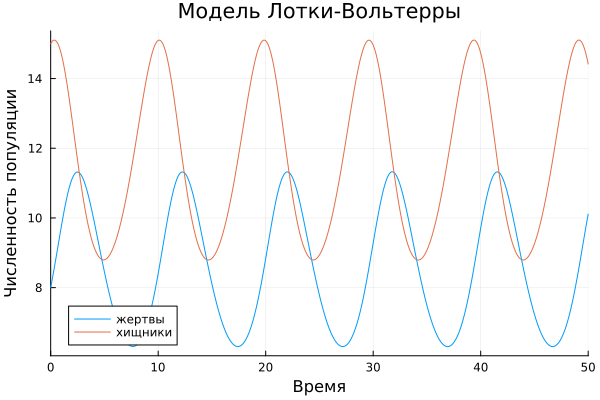

In [7]:
plot(sol, title = "Модель Лотки-Вольтерры", xaxis = "Время", yaxis = "Численность популяции", label = ["жертвы" "хищники"])

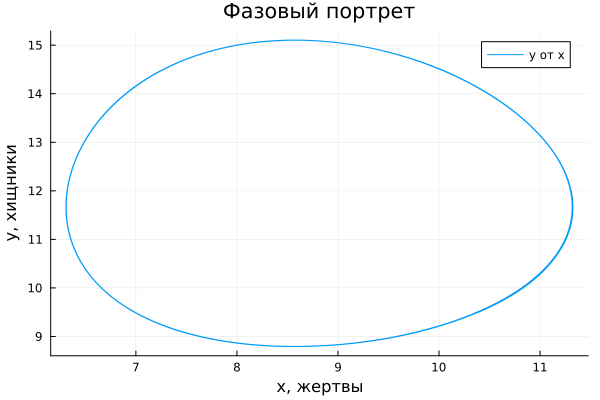

In [9]:
plot(sol, vars=(1, 2), label="y от x", xlabel="x, жертвы", ylabel="y, хищники", title="Фазовый портрет")

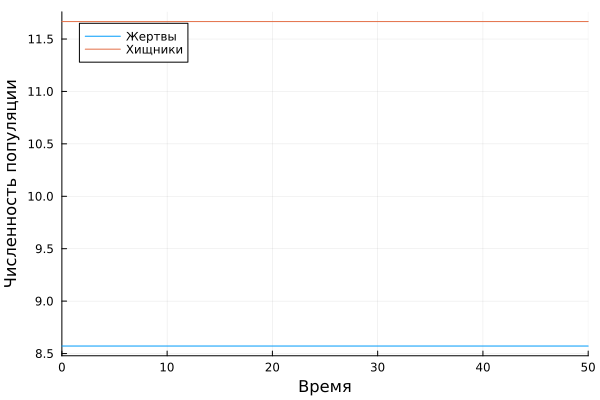

In [24]:
# проверка стационарной точки
x_c = p[3]/p[4]
y_c = p[1]/p[2]
u0_c = [x_c, y_c]
prob2 = ODEProblem(LV, u0_c, tspan, p)
sol2 = solve(prob2, Tsit5())

plot(sol2, xaxis = "Время", yaxis = "Численность популяции", label = ["Жертвы" "Хищники"])

In [13]:
sol2

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 8-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.011099999999999997
  0.11109999999999996
  1.1110999999999995
 11.111099999999993
 50.0
u: 8-element Vector{Vector{Float64}}:
 [8.571428571428571, 11.666666666666666]
 [8.571428571428571, 11.666666666666666]
 [8.571428571428571, 11.666666666666666]
 [8.571428571428571, 11.666666666666666]
 [8.571428571428571, 11.666666666666666]
 [8.571428571428571, 11.666666666666664]
 [8.57142857142821, 11.666666666666831]
 [8.571428708197772, 11.66666664634832]

In [11]:
x_c = p[3]/p[4]

8.571428571428571

In [12]:
y_c = p[1]/p[2]

11.666666666666666

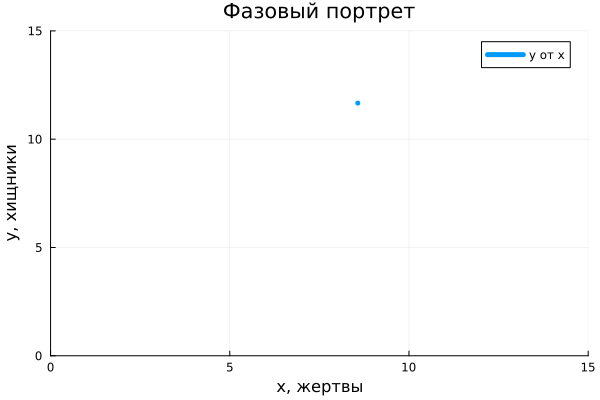

In [23]:
plot(sol2, vars=(1, 2), label="y от x", xlabel="x, жертвы", ylabel="y, хищники", title="Фазовый портрет", xlimit = [0,15], ylimit=[0,15], lw=5)

OpenModelica1

```Modelica
model lab5_1

parameter Real a=-0.7;
parameter Real b=-0.06;
parameter Real c=-0.6;
parameter Real d=-0.07;

parameter Real x0=8;
parameter Real y0=15;

Real x(start=x0);
Real y(start=y0);

equation

der(x) = a*x - b*x*y;
der(y) = -c*y + d*x*y;

end lab5_1;
```

OpenModelica2

```Modelica
model lab5_2
parameter Real a=-0.7;
parameter Real b=-0.06;
parameter Real c=-0.6;
parameter Real d=-0.07;

parameter Real x0=c/d;
parameter Real y0=a/b;

Real x(start=x0);
Real y(start=y0);

equation

der(x) = a*x - b*x*y;
der(y) = -c*y + d*x*y;
end lab5_2;
```